In [3]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from pathlib import Path    

In [86]:
import pickle

# Load Hopfield features
with open("all_features/hopf_features_task.pkl", "rb") as f:
    hopf_rest = pickle.load(f)

# Load Ising/Jansen-Rit features
with open("all_features/rit_features_task.pkl", "rb") as f:
    rit_rest = pickle.load(f)

# Load Advanced Ising landscape features
with open("all_features/Advance_features_task.pkl", "rb") as f:
    adv_rest = pickle.load(f)

# Print keys and a sample
print("🔹 Hopfield Feature Sample:")
first_key = next(iter(hopf_rest))
print(f"Subject ID: {first_key}")
print(hopf_rest[first_key])  # dict of band → feature dict

print("\n🔹 Jansen-Rit Feature Sample:")
first_key = next(iter(rit_rest))
print(f"Subject ID: {first_key}")
print(rit_rest[first_key])  # dict of model params

print("\n🔹 Advanced Energy Landscape Feature Sample:")
first_key = next(iter(adv_rest))
print(f"Subject ID: {first_key}")
print(adv_rest[first_key])  # dict of band → feature dict


🔹 Hopfield Feature Sample:
Subject ID: 2
{'theta': {'n_attractors': 5, 'avg_steps': np.float64(3.86), 'avg_energy': np.float64(-30.728000000000005), 'mean_basin_size': np.float64(20.0), 'basin_entropy': np.float64(1.4256192712874955), 'min_energy_gap': np.float64(0.0), 'avg_energy_gap': np.float64(6.655999999999999), 'load_ratio': 5.2631578947368425}, 'alpha': {'n_attractors': 2, 'avg_steps': np.float64(3.95), 'avg_energy': np.float64(-46.12), 'mean_basin_size': np.float64(50.0), 'basin_entropy': np.float64(0.6923469670899615), 'min_energy_gap': np.float64(0.0), 'avg_energy_gap': np.float64(0.0), 'load_ratio': 5.2631578947368425}, 'beta': {'n_attractors': 2, 'avg_steps': np.float64(4.47), 'avg_energy': np.float64(-40.72000000000001), 'mean_basin_size': np.float64(50.0), 'basin_entropy': np.float64(0.6768585467349507), 'min_energy_gap': np.float64(0.0), 'avg_energy_gap': np.float64(0.0), 'load_ratio': 5.2631578947368425}, 'gamma': {'n_attractors': 6, 'avg_steps': np.float64(4.0), 'avg_e

In [87]:
import pandas as pd

def flatten_features(subject_id, hopf_feats, rit_feats, adv_feats):
    flat = {"subject": subject_id}

    # Hopfield features
    if subject_id in hopf_feats:
        for band, band_feats in hopf_feats[subject_id].items():
            for k, v in band_feats.items():
                flat[f"{band}_{k}"] = float(v)

    # Jansen-Rit features
    if subject_id in rit_feats:
        for k, v in rit_feats[subject_id].items():
            flat[f"rit_{k}"] = float(v)

    # Advanced features
    if subject_id in adv_feats:
        for band, band_feats in adv_feats[subject_id].items():
            if "num_minima" in band_feats:
                flat[f"{band}_num_minima"] = band_feats["num_minima"]
            # Optionally: add summary statistics of energies
            energies = band_feats.get("normalized_energies")
            if energies is not None:
                flat[f"{band}_energy_mean"] = float(np.mean(energies))
                flat[f"{band}_energy_std"] = float(np.std(energies))

    return flat


In [88]:
# Step 1: Flatten all subjects into a list of feature dictionaries
all_subjects = list(set(hopf_rest) | set(rit_rest) | set(adv_rest))

flattened_list = []
for subj_id in all_subjects:
    features = flatten_features(subj_id, hopf_rest, rit_rest, adv_rest)
    flattened_list.append(features)

# Convert to DataFrame
df = pd.DataFrame(flattened_list)

print(f"✅ Combined feature DataFrame created with shape: {df.shape}")
df.head()


✅ Combined feature DataFrame created with shape: (36, 50)


,subject,theta_n_attractors,theta_avg_steps,theta_avg_energy,theta_mean_basin_size,theta_basin_entropy,theta_min_energy_gap,theta_avg_energy_gap,theta_load_ratio,alpha_n_attractors,...,theta_energy_std,alpha_num_minima,alpha_energy_mean,alpha_energy_std,beta_num_minima,beta_energy_mean,beta_energy_std,gamma_num_minima,gamma_energy_mean,gamma_energy_std
0,20,2.0,4.42,-29.8800,50.0,0.688139,0.0,0.000000,5.263158,2.0,...,0.131605,34,0.599548,0.121704,42,0.594187,0.129679,28,0.585277,0.129153
1,15,2.0,3.55,-36.7200,50.0,0.673012,0.0,0.000000,5.263158,2.0,...,0.130287,38,0.592525,0.131374,42,0.609450,0.131767,52,0.560387,0.125538
2,4,10.0,3.97,-18.0400,10.0,2.025132,0.0,1.806222,5.263158,2.0,...,0.115193,20,0.595164,0.117068,14,0.633086,0.122039,22,0.436494,0.097015
3,34,8.0,4.20,-18.9152,12.5,1.651483,0.0,5.057143,5.263158,5.0,...,0.131648,26,0.600217,0.132701,26,0.587472,0.129381,36,0.489373,0.127138
4,16,2.0,4.30,-27.7200,50.0,0.688139,0.0,0.000000,5.263158,2.0,...,0.125822,30,0.607091,0.125887,38,0.562139,0.124644,52,0.486586,0.112311


In [89]:
# Define good and bad subject IDs
good_ids = ['1', '2', '3', '5', '7', '8', 
            '11', '12', '13', '15', '16', '17', 
            '18', '20', '23', '24', '25', '26', 
            '27', '28', '29', '31', '32', '33', 
            '34', '35']

bad_ids = ['0', '4', '6', '9', '10', 
           '14', '19', '21', '22', '30']

# Add labels to DataFrame
def get_label(subj_id):
    if subj_id in good_ids:
        return 1
    elif subj_id in bad_ids:
        return 0
    else:
        return np.nan  # drop if unknown

df["label"] = df["subject"].astype(str).apply(get_label)
df = df.dropna(subset=["label"])  # drop rows without label
df["label"] = df["label"].astype(int)

print(f"✅ Labels added. Final shape: {df.shape}")
print("Class distribution:\n", df["label"].value_counts())


✅ Labels added. Final shape: (36, 51)
Class distribution:
 label
1    26
0    10
Name: count, dtype: int64


In [69]:
with open("all_features/combined_features_rest.pkl", "wb") as f:
    pickle.dump(df, f)

print("✅ Saved combined DataFrame to all_features/combined_features_rest.pkl")


✅ Saved combined DataFrame to all_features/combined_features_rest.pkl


In [ ]:
import pickle
import pandas as pd
import numpy as np

# === Load All Feature Files ===
def load_features():
    with open("all_features/hopf_features_rest.pkl", "rb") as f: hopf_rest = pickle.load(f)
    with open("all_features/rit_features_rest.pkl", "rb") as f: rit_rest = pickle.load(f)
    with open("all_features/Advance_features_rest.pkl", "rb") as f: adv_rest = pickle.load(f)

    with open("all_features/hopf_features_task.pkl", "rb") as f: hopf_task = pickle.load(f)
    with open("all_features/rit_features_task.pkl", "rb") as f: rit_task = pickle.load(f)
    with open("all_features/Advance_features_task.pkl", "rb") as f: adv_task = pickle.load(f)

    return hopf_rest, rit_rest, adv_rest, hopf_task, rit_task, adv_task

# === Define flattening function ===
def flatten_features(subject_id, hopf, rit, adv, prefix="rest"):
    flat = {"subject": subject_id}

    # Hopfield
    if subject_id in hopf:
        for band, band_feats in hopf[subject_id].items():
            for k, v in band_feats.items():
                flat[f"{prefix}_{band}_{k}"] = float(v)

    # Jansen-Rit
    if subject_id in rit:
        for k, v in rit[subject_id].items():
            flat[f"{prefix}_rit_{k}"] = float(v)

    # Advanced landscape
    if subject_id in adv:
        for band, band_feats in adv[subject_id].items():
            if "num_minima" in band_feats:
                flat[f"{prefix}_{band}_num_minima"] = band_feats["num_minima"]
            energies = band_feats.get("normalized_energies")
            if energies is not None:
                flat[f"{prefix}_{band}_energy_mean"] = float(np.mean(energies))
                flat[f"{prefix}_{band}_energy_std"] = float(np.std(energies))

    return flat

# === Get Group Labels ===
good_ids = ['1','2','3','5','7','8','11','12','13','15','16','17','18','20','23','24','25','26','27','28','29','31','32','33','34','35']
bad_ids = ['0','4','6','9','10','14','19','21','22','30']

# === Run ===
hopf_rest, rit_rest, adv_rest, hopf_task, rit_task, adv_task = load_features()

# Combine all subject IDs
all_subjects = list(set(hopf_rest) | set(rit_rest) | set(adv_rest) | set(hopf_task) | set(rit_task) | set(adv_task))

combined = []
for sid in all_subjects:
    row = {}
    row.update(flatten_features(sid, hopf_rest, rit_rest, adv_rest, prefix="rest"))
    row.update(flatten_features(sid, hopf_task, rit_task, adv_task, prefix="task"))
    row["subject"] = sid
    row["label"] = 1 if sid in good_ids else 0
    combined.append(row)

# Convert to DataFrame
df = pd.DataFrame(combined)
print(f"✅ Combined REST+TASK feature DataFrame created: {df.shape}")
print(df["label"].value_counts())

# Save for ML use
df.to_pickle("all_features/combined_features_rest_task.pkl.pkl")
print("💾 Saved as all_features/combined_features_rest_task.pkl.pkl")


✅ Combined REST+TASK feature DataFrame created: (36, 100)
label
1    26
0    10
Name: count, dtype: int64
💾 Saved as all_features/combined_rest_task_features.pkl


/tmp/ipykernel_2406270/1642482108.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: np.mean(x) if isinstance(x, (list, np.ndarray)) else x)
/home/donaf-strange/anaconda3/envs/eeg_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:46:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/donaf-strange/anaconda3/envs/eeg_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:46:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Accuracy: 0.667
✅ F1 Macro Score: 0.585

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.40      0.40        10
           1       0.77      0.77      0.77        26

    accuracy                           0.67        36
   macro avg       0.58      0.58      0.58        36
weighted avg       0.67      0.67      0.67        36



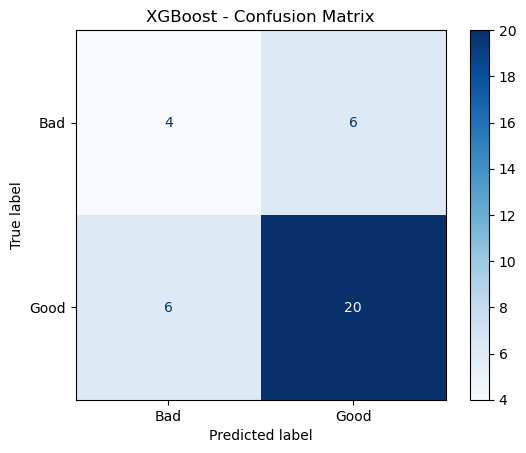

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# === Load combined features ===
with open("all_features/combined_features_rest.pkl", "rb") as f:
    df = pickle.load(f)

# === Clean any dict/list type values
df = df.applymap(lambda x: np.mean(x) if isinstance(x, (list, np.ndarray)) else x)

# === Split features and labels
X = df.drop(columns=["subject", "label"])
y = df["label"]

# === Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Gradient Boosting Classifier (XGBoost)
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# === Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(model, X_scaled, y, cv=cv)

# === Evaluation
acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='macro')

print(f"\n✅ Accuracy: {acc:.3f}")
print(f"✅ F1 Macro Score: {f1:.3f}\n")

print("📊 Classification Report:\n", classification_report(y, y_pred))

# === Confusion Matrix
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bad", "Good"])
disp.plot(cmap="Blues")
plt.title("XGBoost - Confusion Matrix")
plt.show()


/home/donaf-strange/anaconda3/envs/eeg_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:47:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


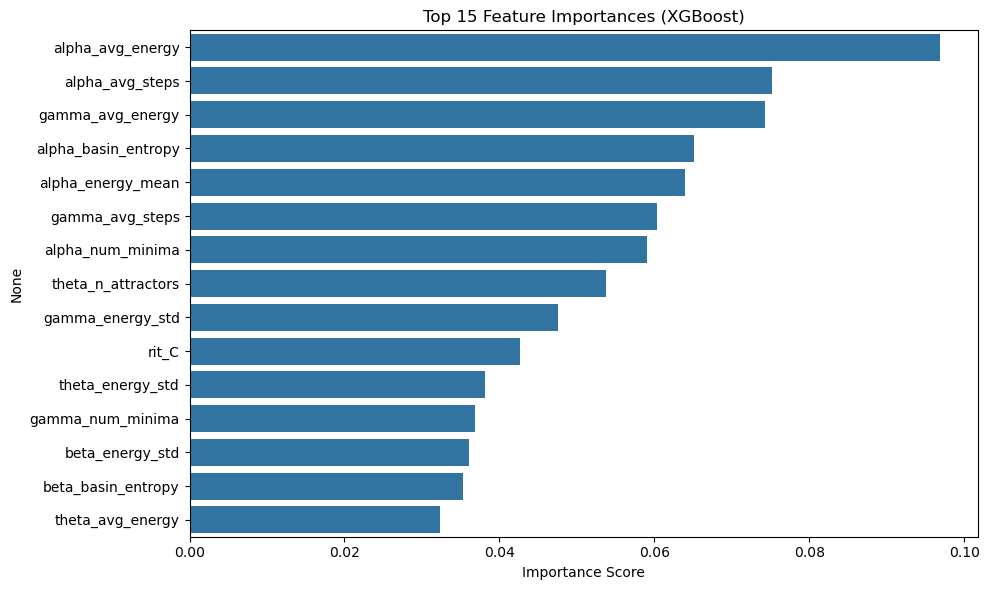

Index(['alpha_avg_energy', 'alpha_avg_steps', 'gamma_avg_energy',
       'alpha_basin_entropy', 'alpha_energy_mean', 'gamma_avg_steps',
       'alpha_num_minima', 'theta_n_attractors', 'gamma_energy_std', 'rit_C',
       'theta_energy_std', 'gamma_num_minima', 'beta_energy_std',
       'beta_basin_entropy', 'theta_avg_energy'],
      dtype='object') [0.09690171 0.07519741 0.07430767 0.06511396 0.06399743 0.06029527
 0.05906195 0.05374344 0.04750922 0.04260359 0.03815714 0.03682399
 0.03605718 0.03530764 0.03229619]


In [91]:
import seaborn as sns

model.fit(X_scaled, y)
importances = model.feature_importances_
feature_names = X.columns

# Sort by importance
sorted_idx = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx][:15], y=feature_names[sorted_idx][:15])
plt.title("Top 15 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
print(feature_names[sorted_idx][:15],importances[sorted_idx][:15])


In [92]:
top_features = ['alpha_avg_energy', 'alpha_avg_steps', 'gamma_avg_energy',
                'alpha_basin_entropy', 'alpha_energy_mean', 'gamma_avg_steps',
                'alpha_num_minima', 'theta_n_attractors', 'gamma_energy_std', 'rit_C']

X_top = df[top_features]
y = df["label"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, stratify=y, random_state=42)

# Retrain model
from xgboost import XGBClassifier
xgb_top = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_top.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import classification_report, accuracy_score
y_pred = xgb_top.predict(X_test)
print(classification_report(y_test, y_pred))


/home/donaf-strange/anaconda3/envs/eeg_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:47:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.78      0.88      0.82         8

    accuracy                           0.73        11
   macro avg       0.64      0.60      0.61        11
weighted avg       0.70      0.73      0.71        11



alpha_avg_energy → alpha_avg_energy
alpha_avg_steps → alpha_avg_steps
gamma_avg_energy → gamma_avg_energy
alpha_basin_entropy → alpha_basin_entropy
alpha_energy_mean → alpha_energy_mean
gamma_avg_steps → gamma_avg_steps
alpha_num_minima → alpha_num_minima
theta_n_attractors → theta_n_attractors
gamma_energy_std → gamma_energy_std
rit_C → rit_C
🔍 Matching selected features to available columns...

✅ alpha_avg_energy          → alpha_avg_energy
✅ alpha_avg_steps           → alpha_avg_steps
✅ gamma_avg_energy          → gamma_avg_energy
✅ alpha_basin_entropy       → alpha_basin_entropy
✅ alpha_energy_mean         → alpha_energy_mean
✅ gamma_avg_steps           → gamma_avg_steps
✅ alpha_num_minima          → alpha_num_minima
✅ theta_n_attractors        → theta_n_attractors
✅ gamma_energy_std          → gamma_energy_std
✅ rit_C                     → rit_C


/home/donaf-strange/anaconda3/envs/eeg_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:42:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 Classification Report After SMOTE:

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.86      0.75      0.80         8

    accuracy                           0.81        16
   macro avg       0.82      0.81      0.81        16
weighted avg       0.82      0.81      0.81        16

✅ Accuracy: 0.812


/tmp/ipykernel_2406270/1338401559.py:82: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/donaf-strange/anaconda3/envs/eeg_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


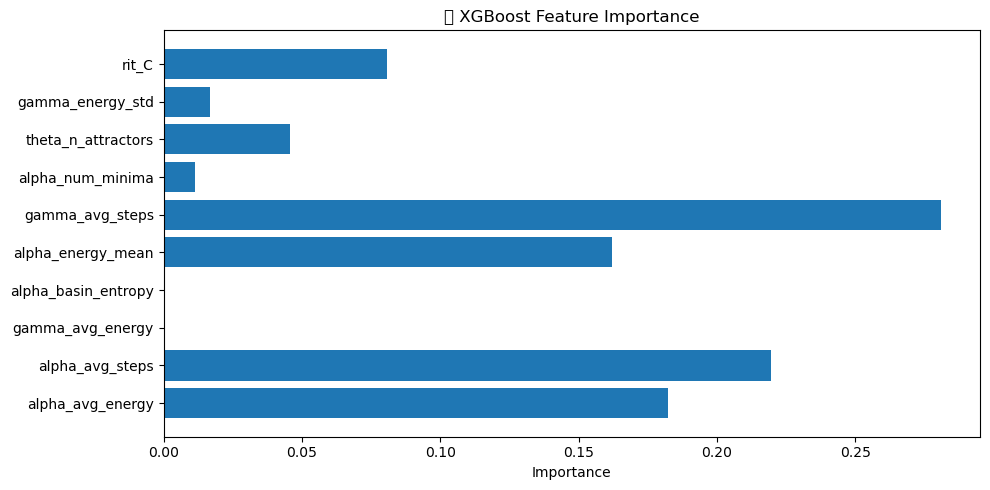

In [81]:
# if column error

from difflib import get_close_matches

# Features you want
top_features = ['alpha_avg_energy', 'alpha_avg_steps', 'gamma_avg_energy',
                'alpha_basin_entropy', 'alpha_energy_mean', 'gamma_avg_steps',
                'alpha_num_minima', 'theta_n_attractors', 'gamma_energy_std', 'rit_C']

# All available features
available_features = df.columns.tolist()

# Find best matches for each
for feat in top_features:
    match = get_close_matches(feat, available_features, n=1)
    print(f"{feat} → {match[0] if match else '❌ No match found'}")


from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from difflib import get_close_matches

# === Define top desired features ===
desired_features = [
    'alpha_avg_energy', 'alpha_avg_steps', 'gamma_avg_energy',
    'alpha_basin_entropy', 'alpha_energy_mean', 'gamma_avg_steps',
    'alpha_num_minima', 'theta_n_attractors', 'gamma_energy_std', 'rit_C'
]

# === Fix column name mismatches ===
actual_cols = df.columns.tolist()
selected_features = []

print("🔍 Matching selected features to available columns...\n")
for feat in desired_features:
    match = get_close_matches(feat, actual_cols, n=1)
    if match:
        selected_features.append(match[0])
        print(f"✅ {feat:25} → {match[0]}")
    else:
        print(f"❌ {feat:25} → No match found")

# === Prepare features and label ===
X = df[selected_features]
y = df["label"]

# === Optional: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Apply SMOTE for class balance
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

# === Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# === Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# === Evaluate model
y_pred = model.predict(X_test)

print("\n📊 Classification Report After SMOTE:\n")
print(classification_report(y_test, y_pred))
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# === Feature importance plot
importances = model.feature_importances_
plt.figure(figsize=(10, 5))
plt.barh(selected_features, importances)
plt.title("🔬 XGBoost Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()



In [93]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# === Select top features from before
top_features = ['alpha_avg_energy', 'alpha_avg_steps', 'gamma_avg_energy',
                'alpha_basin_entropy', 'alpha_energy_mean', 'gamma_avg_steps',
                'alpha_num_minima', 'theta_n_attractors', 'gamma_energy_std', 'rit_C']

X = df[top_features]
y = df["label"]

# === Apply SMOTE to balance data
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# === Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# === Train XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# === Evaluate
y_pred = model.predict(X_test)
print("\n📊 Classification Report After SMOTE:\n")
print(classification_report(y_test, y_pred))


/home/donaf-strange/anaconda3/envs/eeg_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:49:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 Classification Report After SMOTE:

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.86      0.75      0.80         8

    accuracy                           0.81        16
   macro avg       0.82      0.81      0.81        16
weighted avg       0.82      0.81      0.81        16



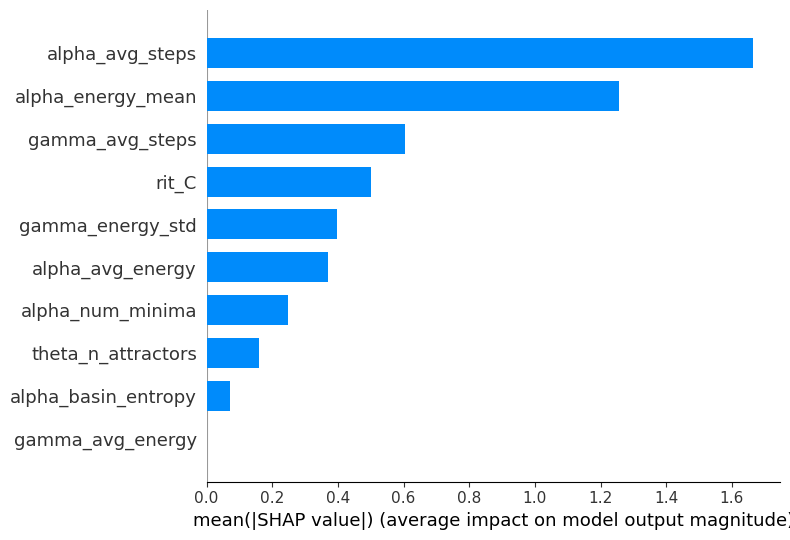

In [94]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Plot summary
shap.summary_plot(shap_values, X_test, plot_type="bar")


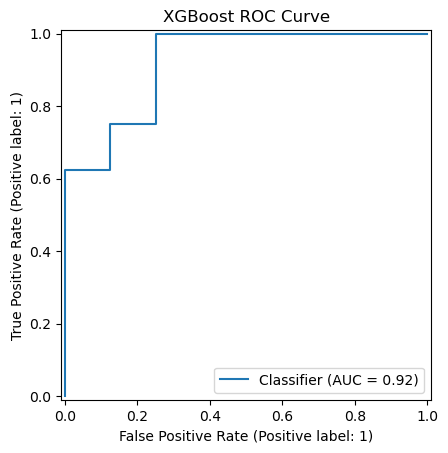

🧮 AUC Score: 0.922


In [95]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

y_prob = model.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("XGBoost ROC Curve")
plt.show()
print(f"🧮 AUC Score: {roc_auc_score(y_test, y_prob):.3f}")


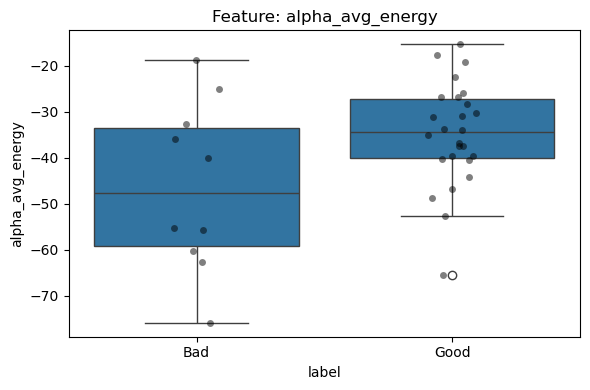

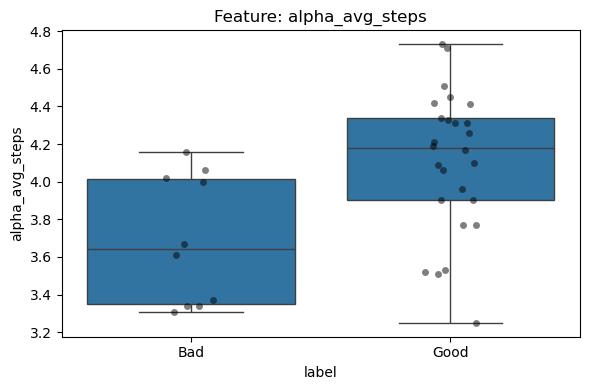

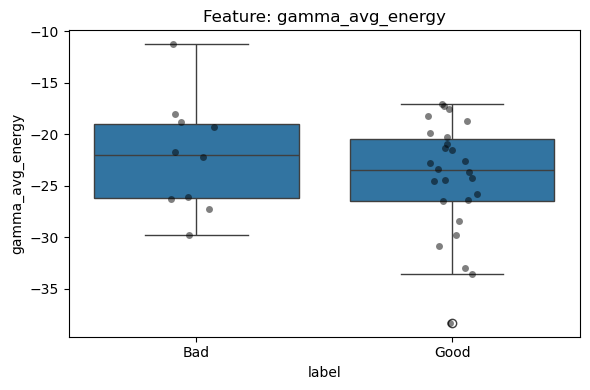

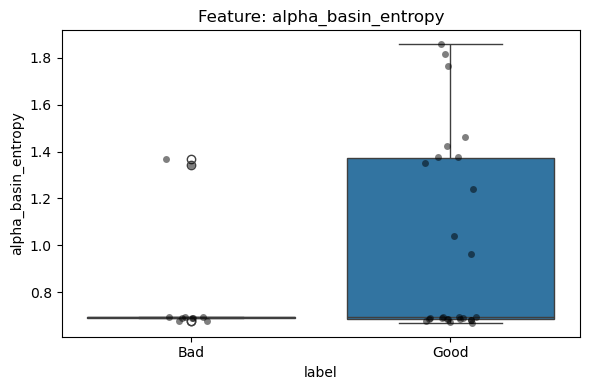

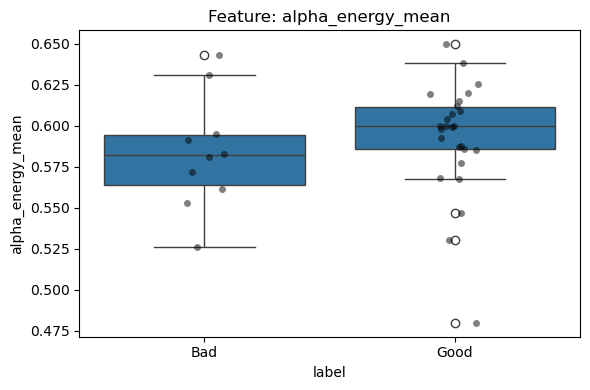

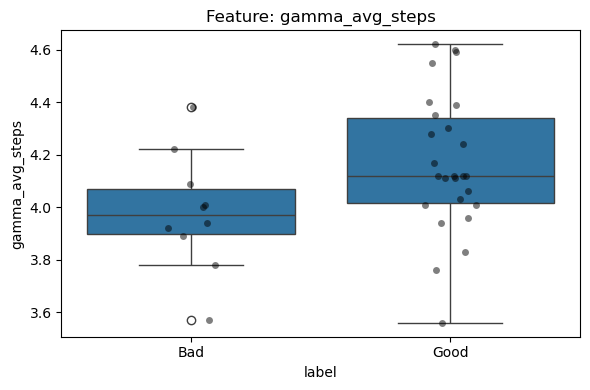

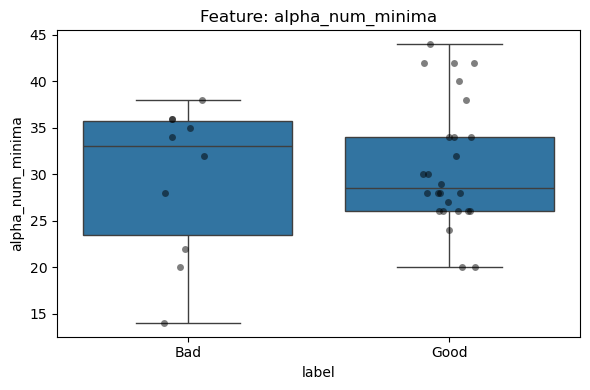

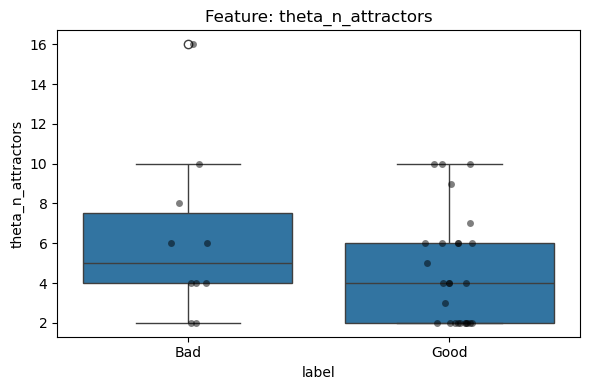

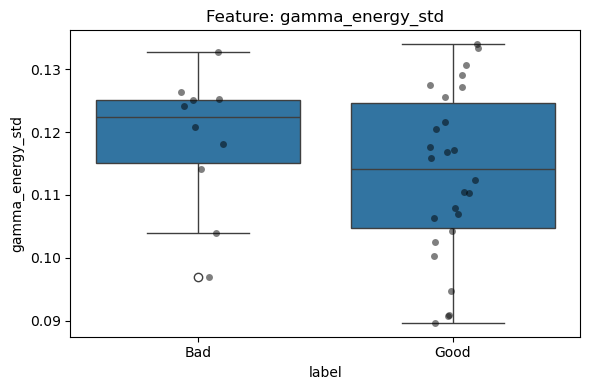

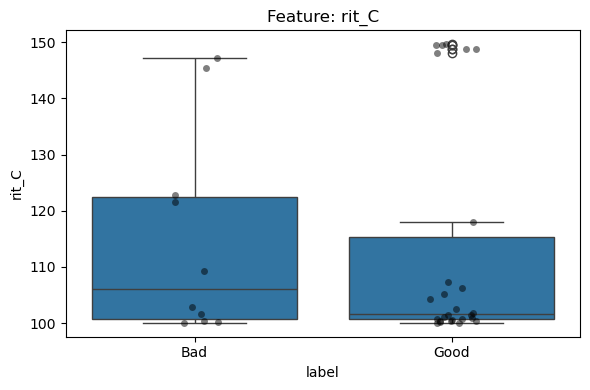

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Use your final dataframe
features_to_plot = [
    'alpha_avg_energy', 'alpha_avg_steps', 'gamma_avg_energy',
    'alpha_basin_entropy', 'alpha_energy_mean', 'gamma_avg_steps',
    'alpha_num_minima', 'theta_n_attractors', 'gamma_energy_std', 'rit_C'
]

for feat in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="label", y=feat, data=df)
    sns.stripplot(x="label", y=feat, data=df, color='black', alpha=0.5)
    plt.title(f"Feature: {feat}")
    plt.xticks([0, 1], ["Bad", "Good"])
    plt.tight_layout()
    plt.show()


In [98]:
from scipy.stats import mannwhitneyu

for feat in features_to_plot:
    group0 = df[df["label"] == 0][feat]
    group1 = df[df["label"] == 1][feat]
    stat, p = mannwhitneyu(group0, group1)
    print(f"{feat:25s} | p = {p:.4f}")


alpha_avg_energy          | p = 0.1081
alpha_avg_steps           | p = 0.0059
gamma_avg_energy          | p = 0.5135
alpha_basin_entropy       | p = 0.5122
alpha_energy_mean         | p = 0.2099
gamma_avg_steps           | p = 0.0310
alpha_num_minima          | p = 1.0000
theta_n_attractors        | p = 0.3097
gamma_energy_std          | p = 0.3141
rit_C                     | p = 0.8184
